# The First Step In Automating the Accounts Payable Workflow using OCR
## Phase 1: Invoice Exctraction

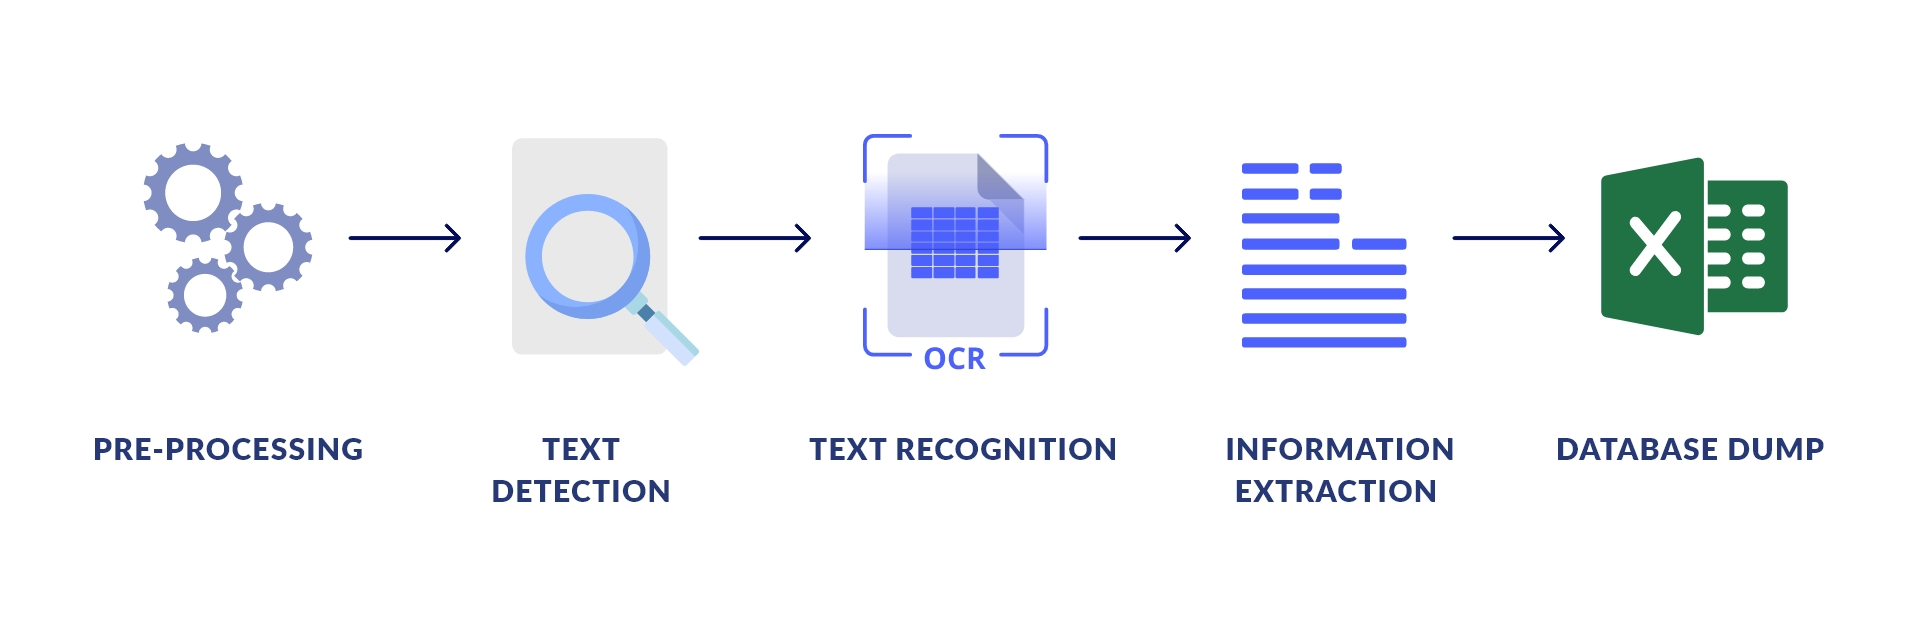

Optical character recognition or optical character reader (OCR) is the electronic or mechanical conversion of images of typed, handwritten or printed text into machine-encoded text, whether from a scanned document, a photo of a document, a scene photo (for example the text on signs and billboards in a landscape photo) or from subtitle text superimposed on an image (for example: from a television broadcast).

Widely used as a form of data entry from printed paper data records – whether passport documents, invoices, bank statements, computerized receipts, business cards, mail, printed data, or any suitable documentation – it is a common method of digitizing printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as cognitive computing, machine translation, (extracted) text-to-speech, key data and text mining. OCR is a field of research in pattern recognition, artificial intelligence and computer vision.

Early versions needed to be trained with images of each character, and worked on one font at a time. Advanced systems capable of producing a high degree of accuracy for most fonts are now common, and with support for a variety of image file format inputs.[2] Some systems are capable of reproducing formatted output that closely approximates the original page including images, columns, and other non-textual components.

In [ ]:
!python.exe -m pip install --upgrade pip

In [43]:
import cv2
import numpy as np
import pandas as pd
import pytesseract
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

def extract_coords_n_boxes(img, n = -1):
    #extracting the n-box coords
    processed_img = process_image(img)
    boxes = pytesseract.image_to_boxes(processed_img)
    coords = [cl[2:].split(" ") for cl in boxes.split("0\n")]
    try:
        dig_n = [[int(i) for i in x[:-1]] for x in coords[:n] ]
    except:
        dig_n = [[int(i) for i in x[:-1]] for x in coords[:-1] ]
    box_coords = [[(rec[i], img.shape[0] - rec[i+1]) for i in range(0, 3, 2)] for rec in dig_n]
    return box_coords

In [61]:
def draw_boxes(img):
    boxes = extract_coords_n_boxes(img)
    #drawing the boxes on the image

    fig, ax = plt.subplots()
    ax.imshow(img)
    for box in boxes:
        rect = plt.Rectangle((box[0]), box[1][0]-box[0][0], box[1][1]-box[0][1], linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    plt.show()

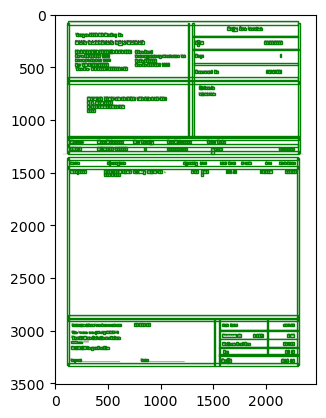

In [62]:
# Load the image
img = cv2.imread('inv141761.jpg')

# Draw boxes around the text regions
draw_boxes(img)


## Method 1 - Extract text from PDF

In [66]:
import pdfplumber

In [67]:
with pdfplumber.open("inv141761.pdf") as pdf:
    page = pdf.pages[0]
    text = page.extract_text()

In [68]:
print(text)

Copy Tax Invoice
Henque 3067 CC Trading As
PMB CATERING EQUIPMENT Date 03/02/2022
83 BOSHOFF STREET, PMB 3201 Absa Bank
Tel + 27 33 394 8864 Pietermaritzburg Chatterton Rd Page 1
Fax + 27 86 612 9599 Code 632005
Vat NO 4130189386 Acc No 409 481 6883
Reg No : CK 2000 / 026044 / 23
Document No IN141761
Deliver to
INDANDA
ITAKANE TRADING 47 (PTY) LTD T/A CAPITOL
P.O. BOX 3572
PIETERMARITZBURG
3200
Account Your Reference Tax Exempt Tax Reference Sales Code
CC010 INDANDA-646806 N 4350232155 MAUR Exclusive
E
Code Description Quantity Unit Unit Price Disc% Tax Nett Price
CTH0004 CUTLERY TRAY GREY 4 DIVISION - 4.00 EAC 111.98 15.00% 447.92
500 X 300 H
Balance After this Transaction: 45 776.72 Sub Total 447.92
Our terms are strictly COD!!!!
Discount @ 0.00% 0.00
Payment on delivery or before
delivery!!!!!
Amount Excl Tax 447.92
Received in good order
Tax 67.19
Signed___________________ Date__________________ Total 515.11


In [69]:
# Split the text into rows based on the newline character
rows = text.split("\n")

# Convert the columns to a pandas DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame as a table in Jupyter Notebook
df

,0
0,Copy Tax Invoice
1,Henque 3067 CC Trading As
2,PMB CATERING EQUIPMENT Date 03/02/2022
3,"83 BOSHOFF STREET, PMB 3201 Absa Bank"
4,Tel + 27 33 394 8864 Pietermaritzburg Chattert...
5,Fax + 27 86 612 9599 Code 632005
6,Vat NO 4130189386 Acc No 409 481 6883
7,Reg No : CK 2000 / 026044 / 23
8,Document No IN141761
9,Deliver to


## Method 2

In [70]:
output = df.to_csv('Output.csv')